# Machine Learning & Statistics 2020 Project

### Power Production Predictions

***

### Project Brief:

 > *In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests*
 
 ***

In [1]:
# for neural networks.
import tensorflow.keras as kr
# for numerical arrays
import numpy as np
# for data frames.
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
# for test and train datasets
import sklearn.model_selection as mod

In [2]:
# Plot style.
plt.style.use("bmh")
# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

<br>

Based on analysis I have performed for a previous project [1], there are a number of outliers present in this dataset. In order to optimise the modelling fit, I will firstly remove these data points from the dataset which will be used in the model.

<br>

In [4]:
#drop the datapoints which have been identified as outliers
data = df.drop([208,340,404,456,490,491,492,493,494,495,496,497,498,499], axis=0)
# reset the indicies so they are once again sequential
data.reset_index(inplace=True)

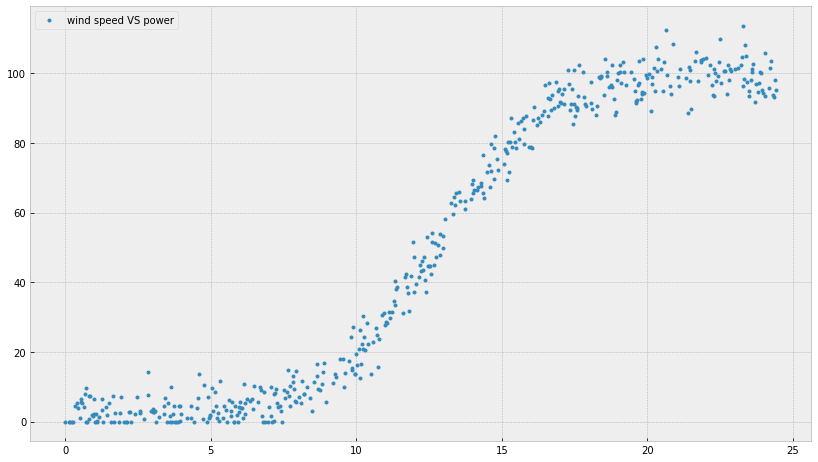

In [5]:
# plot the dataset to get an idea of the shape of the curve
plt.plot(data['speed'], data['power'], '.', label='wind speed VS power')
plt.legend();

<br>

As seen by the above curve, the shape does not appear to be a straight line; thus using only a linear activation function will likely not produce results with a low loss function value.

To be sure, I will start with a linear model and plot the results to see how it looks.

<br>

In [6]:
# from topic 7 in the lectures [2]
model = kr.models.Sequential()
# using a linear activation function
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="ones", bias_initializer="zeros"))
# compiling the the neural network model
model.compile('adam', loss='mean_squared_error')

<br>

In order to fit the data, I will split the data into a training set and a test set, and will use the test data to evaulate the model; at the end of this notebook, the model that produced the lowest loss value will be used for the web service.

<br>

In [7]:
x_train, x_test, y_train, y_test = mod.train_test_split(data['speed'], data['power'], test_size=0.2)

In [8]:
# fit the data using the training sub-dataframes
model.fit(x_train, y_train, epochs=500, batch_size=10)

Epoch 1/500
39/39 [==============================] - 1s 1ms/step - loss: 2577.3694
Epoch 2/500
39/39 [==============================] - 0s 1ms/step - loss: 2348.0497
Epoch 3/500
39/39 [==============================] - 0s 2ms/step - loss: 2307.3385
Epoch 4/500
39/39 [==============================] - 0s 2ms/step - loss: 2514.2970
Epoch 5/500
39/39 [==============================] - 0s 1ms/step - loss: 2197.4071
Epoch 6/500
39/39 [==============================] - 0s 1ms/step - loss: 2356.2890
Epoch 7/500
39/39 [==============================] - 0s 2ms/step - loss: 2221.0322
Epoch 8/500
39/39 [==============================] - 0s 1ms/step - loss: 2053.5172
Epoch 9/500
39/39 [==============================] - 0s 1ms/step - loss: 2128.5978
Epoch 10/500
39/39 [==============================] - 0s 1ms/step - loss: 2140.0234
Epoch 11/500
39/39 [==============================] - 0s 1ms/step - loss: 2034.1116
Epoch 12/500
39/39 [==============================] - 0s 1ms/step - loss: 2012.7934
E

39/39 [==============================] - 0s 1ms/step - loss: 355.5704
Epoch 100/500
39/39 [==============================] - 0s 968us/step - loss: 333.8512
Epoch 101/500
39/39 [==============================] - 0s 1ms/step - loss: 312.1054
Epoch 102/500
39/39 [==============================] - 0s 2ms/step - loss: 324.1453
Epoch 103/500
39/39 [==============================] - 0s 2ms/step - loss: 314.6667
Epoch 104/500
39/39 [==============================] - 0s 1ms/step - loss: 333.2671
Epoch 105/500
39/39 [==============================] - 0s 1ms/step - loss: 309.0907
Epoch 106/500
39/39 [==============================] - 0s 1ms/step - loss: 313.4835
Epoch 107/500
39/39 [==============================] - 0s 1ms/step - loss: 308.1380
Epoch 108/500
39/39 [==============================] - 0s 2ms/step - loss: 308.4932
Epoch 109/500
39/39 [==============================] - 0s 1ms/step - loss: 306.5072
Epoch 110/500
39/39 [==============================] - 0s 984us/step - loss: 314.7458
Ep

39/39 [==============================] - 0s 1ms/step - loss: 261.3146
Epoch 197/500
39/39 [==============================] - 0s 1ms/step - loss: 256.7999
Epoch 198/500
39/39 [==============================] - 0s 1ms/step - loss: 283.3092
Epoch 199/500
39/39 [==============================] - 0s 1ms/step - loss: 258.5858
Epoch 200/500
39/39 [==============================] - 0s 1ms/step - loss: 264.4734
Epoch 201/500
39/39 [==============================] - 0s 1ms/step - loss: 241.0322
Epoch 202/500
39/39 [==============================] - 0s 1ms/step - loss: 263.0925
Epoch 203/500
39/39 [==============================] - 0s 1ms/step - loss: 291.2853
Epoch 204/500
39/39 [==============================] - 0s 2ms/step - loss: 246.5100
Epoch 205/500
39/39 [==============================] - 0s 1ms/step - loss: 254.5034
Epoch 206/500
39/39 [==============================] - 0s 1ms/step - loss: 281.1452
Epoch 207/500
39/39 [==============================] - 0s 1ms/step - loss: 246.7710
Epoch 

39/39 [==============================] - 0s 2ms/step - loss: 225.0565
Epoch 294/500
39/39 [==============================] - 0s 1ms/step - loss: 234.1677
Epoch 295/500
39/39 [==============================] - 0s 1ms/step - loss: 235.1060
Epoch 296/500
39/39 [==============================] - 0s 1ms/step - loss: 232.4645
Epoch 297/500
39/39 [==============================] - 0s 1ms/step - loss: 243.6782
Epoch 298/500
39/39 [==============================] - 0s 1ms/step - loss: 237.2387
Epoch 299/500
39/39 [==============================] - 0s 1ms/step - loss: 231.9360
Epoch 300/500
39/39 [==============================] - 0s 2ms/step - loss: 227.4232
Epoch 301/500
39/39 [==============================] - 0s 1ms/step - loss: 227.7049
Epoch 302/500
39/39 [==============================] - 0s 1ms/step - loss: 234.0732
Epoch 303/500
39/39 [==============================] - 0s 1ms/step - loss: 220.9382
Epoch 304/500
39/39 [==============================] - 0s 1ms/step - loss: 246.7490
Epoch 

39/39 [==============================] - 0s 1ms/step - loss: 216.3502
Epoch 391/500
39/39 [==============================] - 0s 1ms/step - loss: 216.2139
Epoch 392/500
39/39 [==============================] - 0s 1ms/step - loss: 225.4494
Epoch 393/500
39/39 [==============================] - 0s 1ms/step - loss: 210.8413
Epoch 394/500
39/39 [==============================] - 0s 2ms/step - loss: 215.9308
Epoch 395/500
39/39 [==============================] - 0s 1ms/step - loss: 231.0609
Epoch 396/500
39/39 [==============================] - 0s 1ms/step - loss: 202.2038
Epoch 397/500
39/39 [==============================] - 0s 1ms/step - loss: 212.4694
Epoch 398/500
39/39 [==============================] - 0s 1ms/step - loss: 241.8638
Epoch 399/500
39/39 [==============================] - 0s 1ms/step - loss: 233.2135
Epoch 400/500
39/39 [==============================] - 0s 1ms/step - loss: 199.2737
Epoch 401/500
39/39 [==============================] - 0s 1ms/step - loss: 211.5139
Epoch 

39/39 [==============================] - 0s 1ms/step - loss: 209.3150
Epoch 488/500
39/39 [==============================] - 0s 2ms/step - loss: 189.8739
Epoch 489/500
39/39 [==============================] - 0s 1ms/step - loss: 215.2712
Epoch 490/500
39/39 [==============================] - 0s 1ms/step - loss: 198.2898
Epoch 491/500
39/39 [==============================] - 0s 1ms/step - loss: 203.3731
Epoch 492/500
39/39 [==============================] - 0s 1ms/step - loss: 214.2794
Epoch 493/500
39/39 [==============================] - 0s 1ms/step - loss: 205.0278
Epoch 494/500
39/39 [==============================] - 0s 1ms/step - loss: 211.6037
Epoch 495/500
39/39 [==============================] - 0s 1ms/step - loss: 208.1044
Epoch 496/500
39/39 [==============================] - 0s 1ms/step - loss: 214.4453
Epoch 497/500
39/39 [==============================] - 0s 1ms/step - loss: 207.9379
Epoch 498/500
39/39 [==============================] - 0s 1ms/step - loss: 199.8704
Epoch 

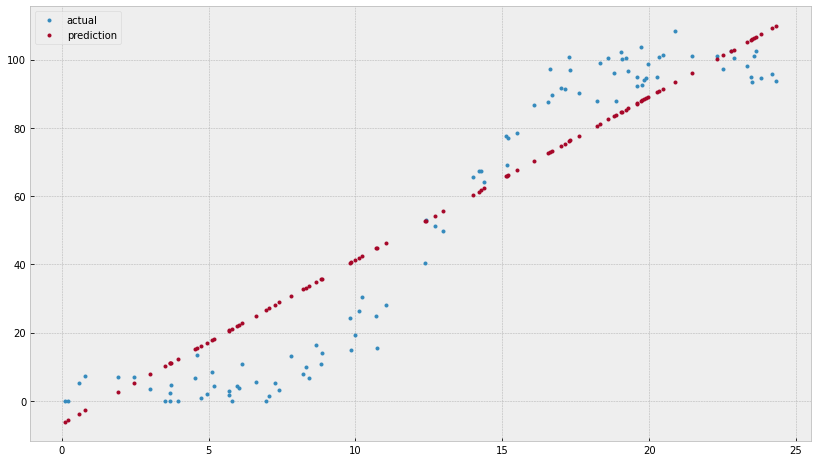

In [9]:
# visua;lising the effectiveness of the predictor using the test data set
plt.plot(x_test, y_test, '.', label='actual')
plt.plot(x_test, model.predict(x_test), '.', label='prediction')
plt.legend();

In [10]:
# Evaluate the neural network on the test data.
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 213.6501


213.65008544921875

<br>

While this straight line does seem to be the best linear approximation of the data, the linear prediction does not appear top be the best approach.

Instead, I will consider the addition of the sigmoid activation model to the layers of the neural network, to see if this reduces the output of the loss function.

<br>

In [11]:
# from topic 7 in the lectures [2]
model = kr.models.Sequential()
# using 2 sigmoid function layers, as well as 1 linear function layer
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="random_normal", bias_initializer="zeros"))
#model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="random_normal", bias_initializer="zeros"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="ones", bias_initializer="zeros"))
# compiling the the neural network model
model.compile('adam', loss='mean_squared_error')

In [12]:
# through trial and error, identified that 200 epochs is sufficient to bottom out the loss in this instance
model.fit(x_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
39/39 [==============================] - 1s 2ms/step - loss: 2451.7430
Epoch 2/200
39/39 [==============================] - 0s 1ms/step - loss: 1821.1853
Epoch 3/200
39/39 [==============================] - 0s 1ms/step - loss: 1609.2215
Epoch 4/200
39/39 [==============================] - 0s 1ms/step - loss: 1294.3638
Epoch 5/200
39/39 [==============================] - 0s 2ms/step - loss: 1251.2088
Epoch 6/200
39/39 [==============================] - 0s 1ms/step - loss: 1148.2908
Epoch 7/200
39/39 [==============================] - 0s 2ms/step - loss: 1174.0235
Epoch 8/200
39/39 [==============================] - 0s 1ms/step - loss: 1135.6051
Epoch 9/200
39/39 [==============================] - 0s 1ms/step - loss: 1130.2268
Epoch 10/200
39/39 [==============================] - 0s 2ms/step - loss: 1143.4897
Epoch 11/200
39/39 [==============================] - 0s 2ms/step - loss: 1147.4435
Epoch 12/200
39/39 [==============================] - 0s 1ms/step - loss: 1082.2053
E

39/39 [==============================] - 0s 1ms/step - loss: 173.9238
Epoch 100/200
39/39 [==============================] - 0s 1ms/step - loss: 177.1637
Epoch 101/200
39/39 [==============================] - 0s 1ms/step - loss: 171.5550
Epoch 102/200
39/39 [==============================] - 0s 1ms/step - loss: 157.6620
Epoch 103/200
39/39 [==============================] - 0s 1ms/step - loss: 157.3640
Epoch 104/200
39/39 [==============================] - 0s 1ms/step - loss: 162.2564
Epoch 105/200
39/39 [==============================] - 0s 1ms/step - loss: 140.9525
Epoch 106/200
39/39 [==============================] - 0s 1ms/step - loss: 143.3051
Epoch 107/200
39/39 [==============================] - 0s 1ms/step - loss: 140.4570
Epoch 108/200
39/39 [==============================] - 0s 1ms/step - loss: 138.5200
Epoch 109/200
39/39 [==============================] - 0s 1ms/step - loss: 147.5676
Epoch 110/200
39/39 [==============================] - 0s 1ms/step - loss: 131.2619
Epoch 

39/39 [==============================] - 0s 1ms/step - loss: 46.1042
Epoch 198/200
39/39 [==============================] - 0s 1ms/step - loss: 44.8458
Epoch 199/200
39/39 [==============================] - 0s 1ms/step - loss: 43.7047
Epoch 200/200
39/39 [==============================] - 0s 1ms/step - loss: 47.4887


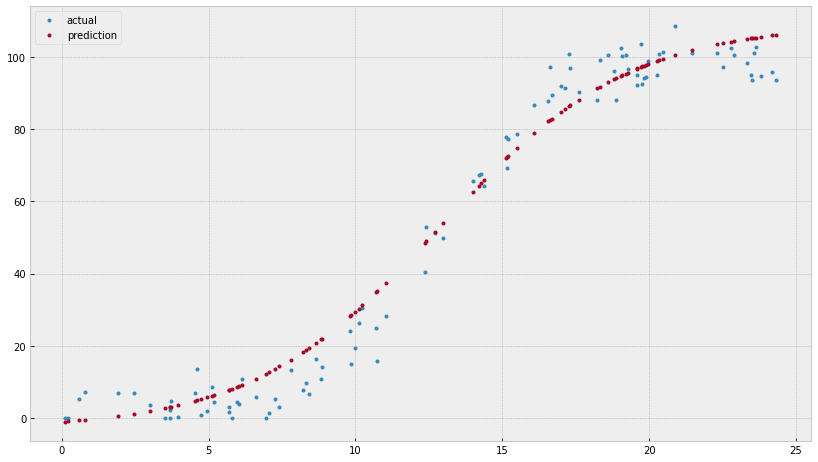

In [13]:
# visua;lising the effectiveness of the predictor using the test data set
plt.plot(x_test, y_test, '.', label='actual')
plt.plot(x_test, model.predict(x_test), '.', label='prediction')
plt.legend();

In [14]:
# Evaluate the neural network on the test data.
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 47.1965


47.19647216796875

<br>

Clearly the addition of the sigmoid function has greatly improved the prediction accuracy of the model, as shown by both the plot and the evaluation of the model again the test data set.

To see if this prediction can be immproved on, or if this is in fact the lowest result from the loss function that can be obtained from this dataset, I will investigate the results of adding another layer with a sigmoid function to the model.

<br>

In [15]:
# from topic 7 in the lectures [2]
model = kr.models.Sequential()
# using 2 sigmoid function layers, as well as 1 linear function layer
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="random_normal", bias_initializer="zeros"))
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="random_normal", bias_initializer="zeros"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="ones", bias_initializer="zeros"))
# compiling the the neural network model
model.compile('adam', loss='mean_squared_error')

In [16]:
model.fit(x_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
39/39 [==============================] - 1s 1ms/step - loss: 1989.1276
Epoch 2/200
39/39 [==============================] - 0s 2ms/step - loss: 1751.2971
Epoch 3/200
39/39 [==============================] - ETA: 0s - loss: 1269.08 - 0s 1ms/step - loss: 1599.9460
Epoch 4/200
39/39 [==============================] - 0s 2ms/step - loss: 1582.3670
Epoch 5/200
39/39 [==============================] - 0s 2ms/step - loss: 1555.6862
Epoch 6/200
39/39 [==============================] - 0s 2ms/step - loss: 1563.7052
Epoch 7/200
39/39 [==============================] - 0s 2ms/step - loss: 1515.5019
Epoch 8/200
39/39 [==============================] - 0s 2ms/step - loss: 1464.7407
Epoch 9/200
39/39 [==============================] - 0s 2ms/step - loss: 1486.0826
Epoch 10/200
39/39 [==============================] - 0s 2ms/step - loss: 1407.7777
Epoch 11/200
39/39 [==============================] - 0s 1ms/step - loss: 1496.7445
Epoch 12/200
39/39 [==============================] - 0s 2m

Epoch 100/200
39/39 [==============================] - 0s 1ms/step - loss: 18.6195
Epoch 101/200
39/39 [==============================] - 0s 2ms/step - loss: 17.3100
Epoch 102/200
39/39 [==============================] - 0s 2ms/step - loss: 16.6013
Epoch 103/200
39/39 [==============================] - 0s 2ms/step - loss: 15.5160
Epoch 104/200
39/39 [==============================] - 0s 2ms/step - loss: 18.9827
Epoch 105/200
39/39 [==============================] - 0s 2ms/step - loss: 20.1252
Epoch 106/200
39/39 [==============================] - 0s 2ms/step - loss: 15.6607
Epoch 107/200
39/39 [==============================] - 0s 2ms/step - loss: 13.3841
Epoch 108/200
39/39 [==============================] - 0s 2ms/step - loss: 16.5834
Epoch 109/200
39/39 [==============================] - 0s 2ms/step - loss: 19.6772
Epoch 110/200
39/39 [==============================] - 0s 1ms/step - loss: 16.3599
Epoch 111/200
39/39 [==============================] - 0s 2ms/step - loss: 18.6746
Epoc

39/39 [==============================] - 0s 2ms/step - loss: 15.0705
Epoch 199/200
39/39 [==============================] - 0s 1ms/step - loss: 16.9133
Epoch 200/200
39/39 [==============================] - 0s 2ms/step - loss: 17.7613


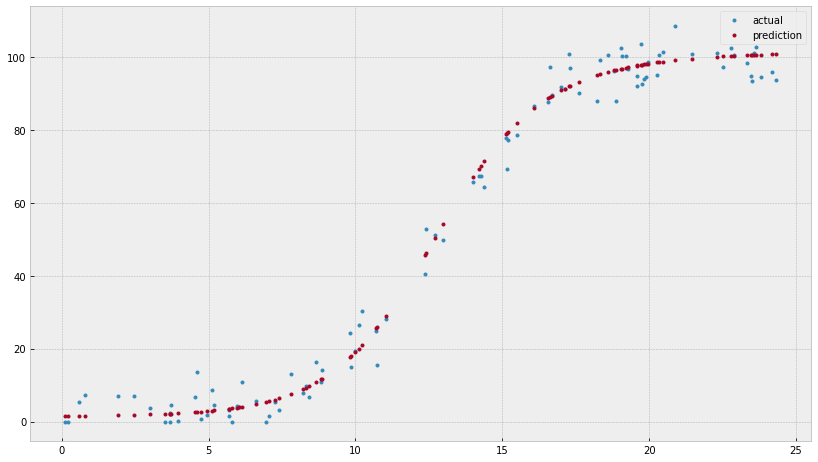

In [17]:
# visua;lising the effectiveness of the predictor using the test data set
plt.plot(x_test, y_test, '.', label='actual')
plt.plot(x_test, model.predict(x_test), '.', label='prediction')
plt.legend();

In [18]:
# Evaluate the neural network on the test data.
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 19.5791


19.5791072845459

In [24]:
# visualising output of predict function to figure out how to access output for webservice.
model.predict([10])[0][0]

19.073124

<br>

By adding the second sigmoid function, the loss function has again reduced by over half when evaluated on the test data. Thus I will use this method to produce the prediction model for power production which will be deployed in the web service.

<br>

#### References

[1]Fundamentals of Data Analysis Project 2020; Dervla Candon; https://github.com/dervlac/FDA-Assessment/blob/main/FDA%20Project.ipynb

[2] Linear Regression in Keras; Ian McLoughlin; https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb

[3]

***

# End

***